In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [18]:
X

array([[ 846006,    1000],
       [3269865,    4000],
       [4078603,    5500],
       [3906961,    5500],
       [5537664,    5500],
       [6698846,    6000],
       [6262120,    6000],
       [5584219,    6500],
       [5298702,    7000],
       [4662696,    7000],
       [6204254,    7000],
       [5145720,    7000],
       [4549035,    6500],
       [4085505,    6000],
       [3277097,    5500],
       [2854797,    5000],
       [2787967,    4000],
       [1719902,    2500],
       [ 728973,    1500],
       [ 219408,    1000]], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
X_train

array([[1719902,    2500],
       [6262120,    6000],
       [4085505,    6000],
       [5537664,    5500],
       [4078603,    5500],
       [6698846,    6000],
       [3277097,    5500],
       [4662696,    7000],
       [5584219,    6500],
       [2787967,    4000],
       [5145720,    7000],
       [3906961,    5500],
       [ 846006,    1000],
       [2854797,    5000],
       [4549035,    6500]], dtype=int64)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-1.52557048, -1.75      ],
       [ 1.34586881,  0.4375    ],
       [-0.03011487,  0.4375    ],
       [ 0.8878918 ,  0.125     ],
       [-0.03447808,  0.125     ],
       [ 1.62195248,  0.4375    ],
       [-0.54116354,  0.125     ],
       [ 0.33476611,  1.0625    ],
       [ 0.91732233,  0.75      ],
       [-0.85037527, -0.8125    ],
       [ 0.64011783,  1.0625    ],
       [-0.14298445,  0.125     ],
       [-2.07801849, -2.6875    ],
       [-0.80812757, -0.1875    ],
       [ 0.2629134 ,  0.75      ]])

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
print(y_pred)
print(y_test)

[ 500 1000  500 6000 6000]
[ 400 9600  100 6000 6000]


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 2 0]
 [0 0 0 1 0 0]]


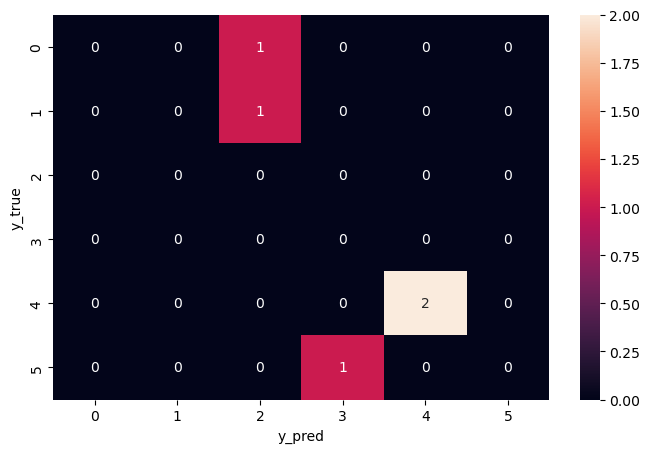

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [28]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         100       0.00      0.00      0.00         1
         400       0.00      0.00      0.00         1
         500       0.00      0.00      0.00         0
        1000       0.00      0.00      0.00         0
        6000       1.00      1.00      1.00         2
        9600       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.40      0.40      0.40         5



d:\user\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1434: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\user\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1434: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\user\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1434: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\user\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1434: UndefinedMe

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

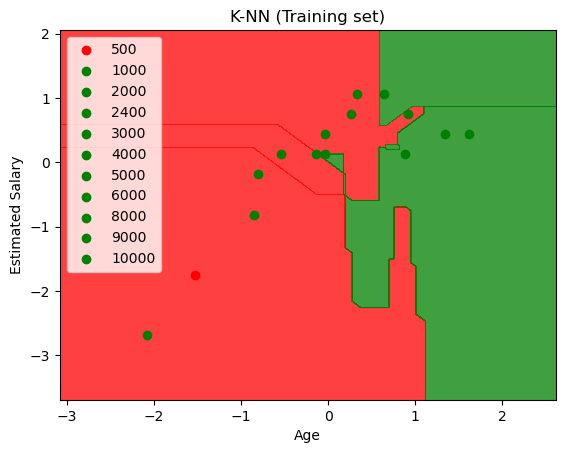

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

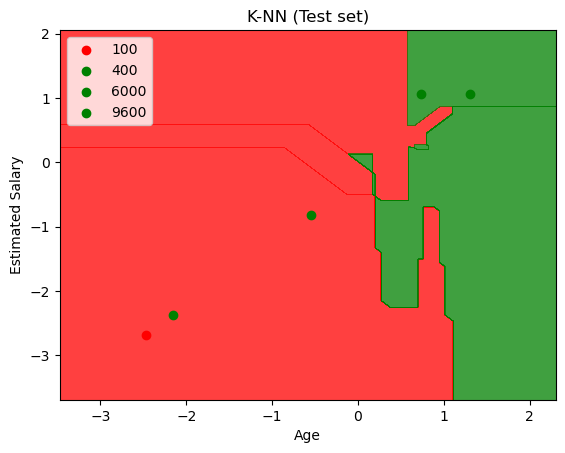

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()